### Analyze Home Pages text through NLP

Using the Spacy library, we take a quick look at entities that are most frequently found on hospital sites websites.

In [1]:
import pandas as pd

In [2]:
#Read entity summary
entity_summary_df = pd.read_csv('../screenshots/entities_results_060918.csv')
#Read tokens summary
tokens_summary_df = pd.read_csv('../screenshots/tokens_results_060918.csv')
#Read entitiy corpus for each site
entity_bysite_df = pd.read_csv('../screenshots/entity_site_data_060918.csv')
#Read tokens corpus for each site
tokens_bysite_df = pd.read_csv('../screenshots/token_site_data_060918.csv')


### Explanation of columns found on entities

URL - Hospital site URL

GPE - Countries, cities, states.

LOC - Non-GPE locations, mountain ranges, bodies of water.

NORP - Nationalities or religious or political groups.

ORG - Companies, agencies, institutions, etc.

PERSON - People, including fictional.

PRODUCT - Objects, vehicles, foods, etc. (Not services.)

WORK_OF_ART - Titles of books, songs, etc.

In [3]:
entity_summary_df.describe()

,URL,GPE,LOC,NORP,ORG,PERSON,PRODUCT,WORK_OF_ART
count,4138.000000,3955.000000,2356.000000,2066.000000,4093.000000,3887.000000,1969.000000,3237.000000
mean,2068.500000,14.074589,2.848048,4.666021,58.595407,15.671469,2.997969,4.071362
std,1194.682036,23.490584,3.348137,12.598850,84.834106,42.402816,15.390249,7.351339
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1034.250000,4.000000,1.000000,1.000000,24.000000,4.000000,1.000000,2.000000
50%,2068.500000,8.000000,2.000000,2.000000,41.000000,7.000000,2.000000,3.000000
75%,3102.750000,15.000000,3.000000,3.000000,71.000000,15.000000,3.000000,5.000000
max,4137.000000,505.000000,74.000000,230.000000,2624.000000,979.000000,469.000000,230.000000


In [4]:
entity_summary_df[['ORG','LOC','PERSON','GPE']].describe()

,ORG,LOC,PERSON,GPE
count,4093.000000,2356.000000,3887.000000,3955.000000
mean,58.595407,2.848048,15.671469,14.074589
std,84.834106,3.348137,42.402816,23.490584
min,1.000000,1.000000,1.000000,1.000000
25%,24.000000,1.000000,4.000000,4.000000
50%,41.000000,2.000000,7.000000,8.000000
75%,71.000000,3.000000,15.000000,15.000000
max,2624.000000,74.000000,979.000000,505.000000


In [5]:
entity_summary_df['ORG'].max()

2624.0

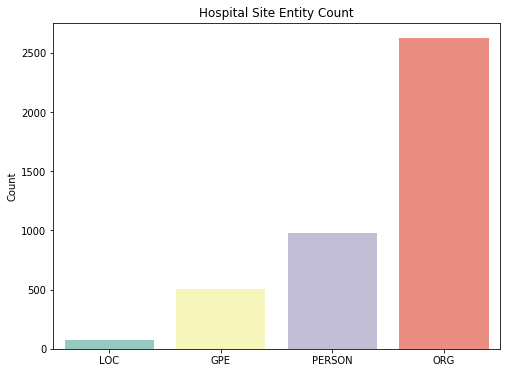

In [6]:
#Display barplot of count on these four entities
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Set up the matplotlib figure
f, ax1 = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

# Display bargraph 
x = np.array(['LOC','GPE','PERSON','ORG'])
y1 = np.array([entity_summary_df['LOC'].max(), 
               entity_summary_df['GPE'].max(),
               entity_summary_df['PERSON'].max(),
               entity_summary_df['ORG'].max()])
sns.barplot(x, y1, palette="Set3", ax=ax1)
ax1.set_title('Hospital Site Entity Count')
ax1.set_ylabel("Count")

The most common word per average on site are ORGs with a mean of 58
It is followed by a Person at 15 and then mentioned of a country city and state with 14


In [7]:
tokens_bysite_df.head()

,URL,ADJ,ADP,ADV,CCONJ,DET,NOUN,NUM,PART,PRON,PUNCT,SYM,VERB
0,TIRR.memorialhermann.org,individual\nwhich\nsolid\nmore\npassionate\nin...,Like\nby\nas\nFOR\nAs\nAt\nbehind\nto\nalong\n...,purely\nthen\nwhen\nnow\njust\nonly\nonline\nw...,&\nOR\nor\nAND\nand,a\nan\neach\nThe\nA\nthose\nALL\nAll\nthe\nall...,outpatient\nmen\naddress\ngoals\ndevelopments\...,"6\nfour\n1,000\n800\n2016\n29\n44-REHAB\n2018\...",to\n's\nUP\nup,they\nThey\nus\nUs\nWe\nthem\nyou\nshe,")\n-\n*\n.\n'\n(\n,\n:\n""\nb",#\n/\n=,address\nSee\ncan\nreach\nproviding\nremembers...
1,acadianmedicalcenter.com,national\nearliest\nMy\nhealthier\nOur\ncancer...,About\nto\nfor\nby\nwithout\nat\nAt\nof,Learn\nHow\nmost\nMore,and\n&\nor,a\nA\nAll\nthe\nall\nthis,Visitors\nTime\ntechnology\nContact\ntime\nCop...,5-STAR\n3501\n2016\n19\nFive\n7500\n3\n5\n2\n3...,to\n's,Us\nWe\nIt\nYou\nyou\nit\nwe,")\n?\n-\n.\n(\n,\n:\n""\nb\n!",-,is\nEARN\n're\nFind\nspot\nAre\nReserved\ncalc...
2,amglafayette.com,Our\ntheir\naggressive\ntherapeutic\nhigh\nind...,About\nthrough\nto\nfor\nas\nwith\nof\nin,multi\nas\nwell\nb'<style\nMore,and,a\neach\nAll\nthe\nAn\nthis,Respiratory\nStatement\nhospitals\nTime\n\xe2\...,1\ntwo\n18,to\nTO,WE\nUs\nWe,/style\n;\n)\n-\ninvolvement.\xc2\xa0\n.wpb_an...,/,is\nspecializes\naccomplish\nensures\nincludes...
3,anadarkohospital.com,which\nmore\nsocial\ntrue\nSecure\nongoing\nth...,About\nthrough\nto\nBecause\nabout\nwhile\nfor...,fiscally\nhow\npublicly\nNOW\ncontinually\nmos...,and\nor,a\nThe\nevery\neach\nthe\nall\nthis\nany,need\npriority\nrange\nsuggestions\nStatement\...,247\n1002\n8258\n2551\n1978\n10\none\n3\n73005...,to\n'\nout,they\nWe\nyou\nit\nwe,")\n-\n.\n(\n,\n:\n""\nb",-,Needs\ncontributes\nwaiting\nreporting\nhelp\n...
4,anchorhospital.com,mental\nliable\nfree\nlimited\nUs\nthat\naddic...,About\nto\nfor\ndue\nABOUT\nby\nwith\ninto\nfr...,more\nRead\nsimply\nb'<style\nnot,and\n&\nor\nbut,Those\na\nThe\nan\nAll\nthe\nany,employees\npractitioners\nfacility\nContact\nr...,122-bed\n\xe2\x80\x93\n7\ntwo\n5454\n770\n2017...,to,Us,/style\n;\n-\n.wpb_animate_when_almost_visible...,-\n/\n=,"walking\nhidden""></iframe\nshown\nreserved\nca..."


#### Most number of people (PERSON) mentioned on a site

CookChildrens.org had a 979 people named on their site. This seems a little too much for a main page, let's explore some of the data.

In [10]:
#Extract cookchildrens.org site information
cookchildrens = entity_bysite_df[entity_bysite_df['URL'] == "www.cookchildrens.org"]
#Get list of names under person
#Show first 20
cookchildrens['PERSON'].values[0].split("\n")[1:20]



['Blake',
 'MD Prosanti',
 'Download',
 'Rafati',
 'Julia',
 'MD Watts',
 'MD Simpson',
 'Jeremy',
 'Dara',
 'Sami',
 'MD Vert',
 'Christina',
 'Laura',
 'MD Tapper',
 'MD Murray',
 'MD Radimecky',
 'Lisa',
 'MD Allender',
 'MD Ansley']

This site uses facebook tiles throughout the main page. Each post contains information about a person or a doctor This explains the large amount of mentions of people in this site

#### Most number of organizations (ORG) mentioned on a site
Ocalahealthsystem.com had a 2,223 words that can be related to an organization named on their site. Let's explore some of the data.

In [11]:
#Extract cookchildrens.org site information
ocala = entity_bysite_df[entity_bysite_df['URL'] == "ocalahealthsystem.com"]
#Get list of names under person
#Show first 20
ocala['ORG'].values[0].split("\n")[1:30]


['Community',
 'Time',
 'Bariatrics Program',
 'News',
 'Ortho Pre-Op Class Apr 24',
 'Ocala Health     Are Household Cleaning Products',
 'Bariatric Support Group',
 'Affiliated Practices       Services    Services',
 'Ocala Regional Medical Center',
 'Wellness Community Center',
 'CPR',
 'Hospital Affiliation',
 'HCA North Florida Division',
 'Ocala Health Unit',
 'Community Hospital',
 'Graduate Medical Education',
 'Patient Portal',
 'the American College of Radiology',
 'Pre-Register',
 'More',
 'RN-C',
 'Search               Search',
 'Blog Articles',
 'Time',
 'Orthopedic Joint Care Center',
 'Legal Information',
 'Social Media',
 'Insurance Plans  Maps & Directions',
 'UOD']

This is one example that sometimes NLP needs to be trained to specific domain. In this case, there's a large amount of false positives. Items that anything that could not be identified in other categories is put as an ORG.  Interesting, a lot of the common links such as 'Social Media', 'Legal Information' were missclassified as ORGs.

#### Most locations (LOC) mentioned on a site

www.osceolaregional.com had a 74 locations named on their site. Let's explore some of the data.

In [12]:
#Extract OsceolaRegional site information
osceolaregional = entity_bysite_df[entity_bysite_df['URL'] == "www.osceolaregional.com"]
#Get list of names under person
#Show first 20
osceolaregional['ORG'].values[0].split("\n")[1:20]


['TAVR Program',
 'News',
 'Lake City Medical Center',
 'Graduate Medical Education',
 'Emergency Department',
 'Stroke Support Group',
 'Pre-Register',
 'Blog Articles',
 'Social Media',
 'C-HCA',
 'HCA  Healthcare',
 'Rehabilitation / Physical Therapy',
 'Trauma Care , Pediatric ER',
 'Blog',
 'Classes & Events',
 'Newsroom  Quality & Patient Safety  Volunteers',
 'Pediatrics Dept',
 'West Florida Hospital',
 'Corporation of America']

Another case of a lot of false positives, but there are some locations that were correctly identified. 'Lake City Medical Center', 'Emergency Department', 'West Florida Hospital' for instance. 

#### Most country, city or state (GPE) mentioned on a site

www.nchosp.org had a 505 country, city of state named on their site. Let's explore some of the data.

In [13]:
#Extract www.nchosp.org  site information
nchosp = entity_bysite_df[entity_bysite_df['URL'] == "www.nchosp.org"]
#Get list of names under person
#Show first 20
nchosp['ORG'].values[0].split("\n")[1:10]


['-82.792168',
 'WMA Occupational Medicine',
 'The Wellness Center - Elizabethton',
 'Medical Services',
 'The Wellness Center - Johnson City',
 'Imaging Centers',
 '-82.090863999999996',
 'Map & Directions',
 'NE Norton']

Looking at the list, there are a lot of coordinates that were correctly matched with a GPE. The source code of the page can be seen to have all locations mentioned Google Map coordinates (lat, log), and this is why it is the site with most GPEs on it. 

#### Most product mentioned on a site

www.ocalaregional.com had a 469 mentioned of product. Let's explore some of the data.

In [14]:
#Extract cookchildrens.org site information
ocala = entity_bysite_df[entity_bysite_df['URL'] == "www.ocalaregional.com"]
#Get list of names under person
#Show first 20
ocala['PRODUCT'].values[0].split("\n")[1:300]
#Somethign is not right about these numbers as it should have been 469 (unless they are repeated)

['Apr 19',
 'Apr 2 Monday',
 'Apr 9 Monday',
 'Apr 30',
 'Apr 23',
 'Apr 2 Monday Ortho Pre-Op Class Apr 2',
 'Apr 4',
 'Apr 24',
 'Apr 11',
 'Apr 5',
 'Apr 26',
 'Apr 10',
 'Apr 18',
 'Apr 3',
 'Apr 16',
 'Apr 9 Monday Ortho Pre-Op Class Apr 9',
 'Apr 25']

#### Most work of art mentioned on a site

www.capitalregionalmedicalcenter.com had 230 mentions of work of art. Let's explore some of the data.

In [15]:
#Extract cookchildrens.org site information
capitalregional = entity_bysite_df[entity_bysite_df['URL'] == "www.capitalregionalmedicalcenter.com"]
#Get list of names under person
#Show first 20
capitalregional['WORK_OF_ART'].values[0].split("\n")[1:300]
#Something is not right as the results marked 230

['are:1 - Countdown To Baby2',
 'Visitor Information',
 'Prenatal Breastfeeding Class',
 'are:1 - Countdown',
 'Capital Regional Medical Center',
 'Jul',
 'Patient Stories',
 'MyHealth One',
 'Family Center Tour',
 'Pay Bill Online']

#### Let's look now at the Verbs on pages

ocalahealthsystem.com had 16,370 VERBS, which seems a little too much, let's look at the data.
Most of them are repeated, only 156 uniques.

The way the page is built, it stores a lot of its content on the HTML of the page to prevent from loading, but this loads the HTML with lots of unseen text.

In [16]:
#Extract cookchildrens.org site information
ocalahealth = tokens_bysite_df[entity_bysite_df['URL'] == "ocalahealthsystem.com"]
#Get list of names under person
#Show first 20
ocalahealth['VERB'].values[0].split("\n")[1:300]

['Are',
 'can',
 'include',
 'having',
 'approved',
 'announces',
 'sound',
 'Save',
 'represents',
 'operating',
 'earned',
 'harm',
 'lose',
 'awarded',
 'visit',
 'cook',
 'perform',
 'have',
 'moving',
 'stay',
 'comprised',
 'Let',
 'meet',
 'living',
 'will',
 'located',
 'become',
 'provides',
 'freestanding',
 'ensuring',
 'keep',
 'diagnosing',
 'recognizes',
 'arrive',
 'care',
 'represent',
 'teach',
 'affect',
 'Do',
 'Make',
 'celebrate',
 'maintaining',
 'STRIVE',
 'defend',
 'connecting',
 'registered',
 'urged',
 'do',
 'Follow',
 'use',
 "we\\'re",
 'start',
 'scheduled',
 'happens',
 'face',
 'take',
 'practice',
 'Getting',
 'Understanding',
 'offers',
 'Experiencing',
 'serve',
 'Read',
 'involve',
 'Come',
 'stand',
 'Find',
 'excited',
 'including',
 'loved',
 'making',
 'empower',
 'help',
 'Recognized',
 'allows',
 'fr\\xe2\\x80\\xa6',
 'Learn',
 'adding',
 'bringing',
 'rid',
 'learn',
 'be',
 'Is',
 'subscribed',
 'find',
 'Take',
 'encompasses',
 'play',
 'gr

#### Largest number of adjectives

ocalahealthsystem.com had 15,138 ADJS on its page as well. Like the VERBS, a lot of it it's hidden from view.



In [17]:
#Extract cookchildrens.org site information
ocalahealth = tokens_bysite_df[entity_bysite_df['URL'] == "ocalahealthsystem.com"]
#Get list of names under person
#Show first 20
ocalahealth['ADJ'].values[0].split("\n")[1:20]
#It has 104 unique

['new',
 'finest',
 'https://t.co/igzj6fno6e',
 'Acceptable',
 'active',
 'worst',
 'many',
 'annual',
 'monthly',
 'long:\\xe2\\x80\\xa6',
 'toxic',
 'aware',
 'Silver',
 'orthopedic',
 'situational',
 'Safe',
 '2-day',
 'surgical',
 'present']

#### Largest number of pronouns

ocalahealthsystem.com had also the largest number of pronouns on its page, 5,460.

#Extract cookchildrens.org site information
ocalahealth = tokens_bysite_df[entity_bysite_df['URL'] == "ocalahealthsystem.com"]
#Get list of names under person
#Show first 20
ocalahealth['PRON'].values[0].split("\n")[1:20]
#It has 104 unique

#### Most commont PRON, ADJ and VERBS

Let's take a look at the most common terms for each category

['best', 'free', 'healthy', 'available', 'comprehensive', 'full', 'high', 'first', 'latest', 'many']
[1248, 965, 963, 929, 886, 866, 829, 824, 799, 797]


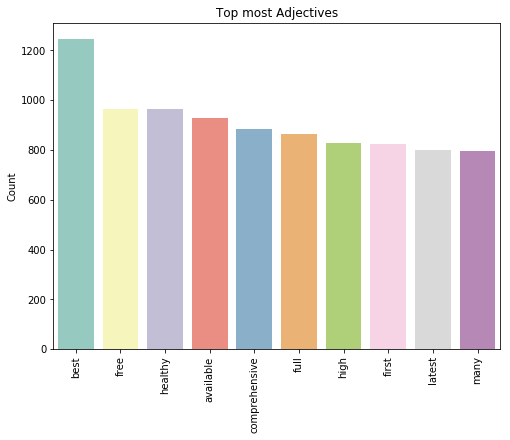

In [18]:
#Parse through all and show most common
from  collections import Counter
adj_counter = Counter()
for adj in tokens_bysite_df['ADJ']:
    try:
        adj_list = adj.split("\n")
        for a in adj_list:
            #Ignore some that are incorrectly classified:
            if(a.lower() not in ['our', 'your', 'main', 'more', 'medical', 'its', 'my', 'that', 'their', 'new', 'other']):
                adj_counter[a.lower()] += 1
    except:
        #Ignore those that are not str
        pass
adj_counter.most_common(10)

most_common_labels = []
most_common_count  = []

for m in adj_counter.most_common(10):
    most_common_labels.append(m[0])
    most_common_count.append(m[1])
print(most_common_labels)
print(most_common_count)
    
#Display Graph
# Set up the matplotlib figure
    
f, ax1 = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

x = np.array(most_common_labels)
y1 = np.array(most_common_count)
sns.barplot(x, y1, palette="Set3", ax=ax1)
ax1.set_title('Top most Adjectives')
ax1.set_xticklabels(x,rotation=90)
ax1.set_ylabel("Count")

In [ ]:
#Show the ones that contain the word 'free'
for k,v in tokens_bysite_df['ADJ'].items():
    if('comprehensive' in v):
        print(k)
        print(tokens_bysite_df['URL'])


In [ ]:
#Show the verbs containing the word 'free'
for k,v in tokens_bysite_df['PRON'].items():
    if('you' in v):
        print(k)
        print(tokens_bysite_df['URL'])

In [ ]:
#Parse through all and show most common
from  collections import Counter
adj_counter = Counter()
for adj in tokens_bysite_df['VERB']:
    try:
        adj_list = adj.split("\n")
        for a in adj_list:
            adj_counter[a.lower()] += 1
    except:
        #Ignore those that are not str
        pass
adj_counter.most_common(10)

most_common_labels = []
most_common_count  = []

for m in adj_counter.most_common(10):
    most_common_labels.append(m[0])
    most_common_count.append(m[1])
print(most_common_labels)
print(most_common_count)
    
#Display Graph
# Set up the matplotlib figure
    
f, ax1 = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

x = np.array(most_common_labels)
y1 = np.array(most_common_count)
sns.barplot(x, y1, palette="Set3", ax=ax1)
ax1.set_title('Top most Verbs')
ax1.set_xticklabels(x,rotation=90)
ax1.set_ylabel("Count")

In [ ]:
#Parse through all and show most common
from  collections import Counter
adj_counter = Counter()
for adj in tokens_bysite_df['PRON']:
    try:
        adj_list = adj.split("\n")
        for a in adj_list:
            adj_counter[a.lower()] += 1
    except:
        #Ignore those that are not str
        pass
adj_counter.most_common(10)

most_common_labels = []
most_common_count  = []

for m in adj_counter.most_common(10):
    most_common_labels.append(m[0])
    most_common_count.append(m[1])
print(most_common_labels)
print(most_common_count)
    
#Display Graph
# Set up the matplotlib figure
    
f, ax1 = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

x = np.array(most_common_labels)
y1 = np.array(most_common_count)
sns.barplot(x, y1, palette="Set3", ax=ax1)
ax1.set_title('Top most Pronouns')
ax1.set_xticklabels(x,rotation=90)
ax1.set_ylabel("Count")

#### Most common Entities
Let's take a look at the most common entities for each category

In [ ]:
for e in ['GPE','LOC', 'ORG','PERSON','PRODUCT', 'WORK_OF_ART']:
    entity_counter = Counter()
    for entity in entity_bysite_df[e]:
        try:
            entity_list = entity.split("\n")
            for n in entity_list:
                if(n):
                    entity_counter[n.lower()] += 1
        except:
            #Ignore those that are not str
            pass
    print("-------- Entity Counter for "+e+"-------")
    print(entity_counter.most_common(20))
    most_common_labels = []
    most_common_count  = []
    for m in entity_counter.most_common(10):
        most_common_labels.append(m[0])
        most_common_count.append(m[1])
    print(most_common_labels)
    print(most_common_count)
    
    #Display Graph
    # Set up the matplotlib figure
    
    f, ax1 = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

    x = np.array(most_common_labels)
    y1 = np.array(most_common_count)
    sns.barplot(x, y1, palette="Set3", ax=ax1)
    ax1.set_title('Top most '+e)
    ax1.set_xticklabels(x,rotation=90)
    ax1.set_ylabel("Count")

### Most common adjectives for sites with most adjectives on their page

Select top 20 hospitals with the most number of adjectives and compute

In [21]:
#Create a count of adjective on each site
def count_list(row):
    l = 0
    try :
        l = len(row.split("\n"))
    except:
        pass
    return l

tokens_bysite_df['adj_count']=tokens_bysite_df['ADJ'].apply(count_list)

In [ ]:
df.drop([0, 1])

In [34]:
# list top sites with the highest nmber of adjective
# Ignore first two as the number one is no longer a hospital site, this site needs to be 
# removed from the list. 
top_20_hospital_with_most_adj = tokens_bysite_df[['URL','adj_count','ADJ']].sort_values(by=['adj_count'], ascending=False)[2:102]

In [35]:
top_20_hospital_with_most_adj.head(11)

,URL,adj_count,ADJ
3672,www.tbhcare.com,301,full\ncapable\nisoptional\nwhich\nindividual\n...
2738,www.ormc.org,240,Frisian\nfull\nMalagasy\nwhich\nunassisted\nLa...
3622,www.susquehannahealth.org,208,Allergic\nRefractive\nHealthy\nAutonomic\nbiop...
219,susquehannahealth.org,208,Allergic\nRefractive\nHealthy\nAutonomic\nbiop...
825,www.charlotteregional.com,182,full\nskeletal\nwhich\nfair\nregular\nHealthy\...
85,ksmedcenter.com,180,emotional\nfull\ncapable\nwhich\nstressful\ngo...
15,bestheartcare.com,178,full\nwhich\nindividual\ntrue\ngood\n5-star\ne...
2596,www.nmh.org,178,which\nstressful\np>\nValet\nsustainable\nregu...
1274,www.faithcommunityhospital.com,177,which\nfair\nregular\ntrue\ngood\neffective\nn...
2594,www.nmbhi.org,165,9-month\nfull\nindividual\nwhich\nstructured\n...


['best', 'many', 'free', 'first', 'better', 'which', 'full', 'surgical', 'available', 'high']
[78, 70, 65, 63, 63, 60, 59, 55, 53, 53]


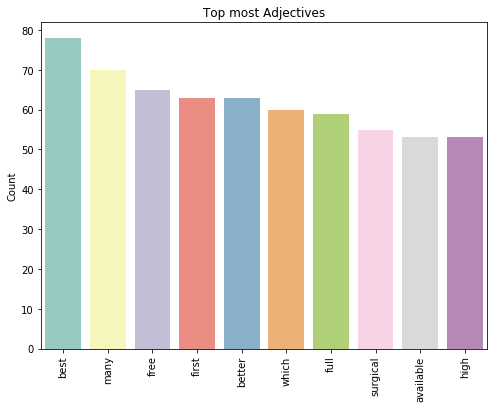

In [33]:
#Repeat but for the top 20 hospitals with largest number of adjective
from  collections import Counter
adj_counter = Counter()
for adj in top_20_hospital_with_most_adj['ADJ']:
    try:
        adj_list = adj.split("\n")
        for a in adj_list:
            #Ignore some that are incorrectly classified:
            if(a.lower() not in ['our', 'your', 'main', 'more', 'medical', 'its', 'my', 'that', 'their', 'new', 'other']):
                adj_counter[a.lower()] += 1
    except:
        #Ignore those that are not str
        pass
adj_counter.most_common(10)

most_common_labels = []
most_common_count  = []

for m in adj_counter.most_common(10):
    most_common_labels.append(m[0])
    most_common_count.append(m[1])
print(most_common_labels)
print(most_common_count)
    
#Display Graph
# Set up the matplotlib figure
    
f, ax1 = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

x = np.array(most_common_labels)
y1 = np.array(most_common_count)
sns.barplot(x, y1, palette="Set3", ax=ax1)
ax1.set_title('Top most Adjectives')
ax1.set_xticklabels(x,rotation=90)
ax1.set_ylabel("Count")